# COVID19 Data Analysis, deriving the correlation with world development index report

In [6]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 

In [8]:
corona_dataset_csv=pd.read_csv("covid19_Confirmed_dataset.csv")
corona_dataset_csv.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27


Cleansing the dataset

In [9]:
corona_dataset_csv.drop(["Lat","Long"],axis=1,inplace=True)

In [10]:
corona_dataset_csv.head()

,Province/State,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
0,NaN,Afghanistan,0,0,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
1,NaN,Albania,0,0,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
2,NaN,Algeria,0,0,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
3,NaN,Andorra,0,0,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
4,NaN,Angola,0,0,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27


Aggregating the rows by country

In [11]:
corona_dataset_agg=corona_dataset_csv.groupby("Country/Region").sum()
corona_dataset_agg.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
Albania,0,0,0,0,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
Algeria,0,0,0,0,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
Andorra,0,0,0,0,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
Angola,0,0,0,0,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27


### Visualizing data related to some countries for a clear idea

Text(0, 0.5, 'Count')

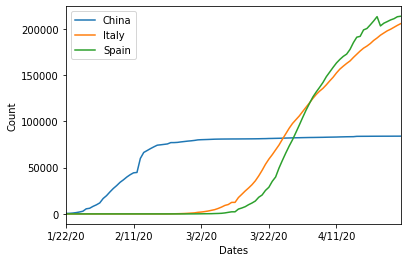

In [17]:
corona_dataset_agg.loc["China"].plot()
corona_dataset_agg.loc["Italy"].plot()
corona_dataset_agg.loc["Spain"].plot()
plt.legend()
plt.xlabel("Dates")
plt.ylabel("Count")

### Checking China's First 3 days report

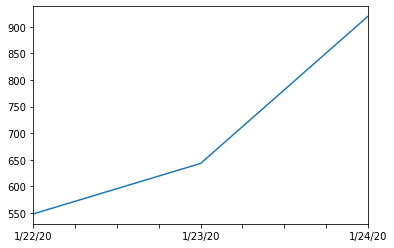

In [22]:
corona_dataset_agg.loc['China'][:3].plot()

#### caculating the first derivative of the curve 

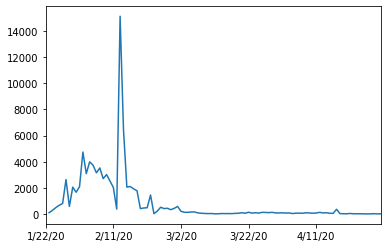

In [23]:
corona_dataset_agg.loc['China'].diff().plot()

#### find maximum infection rate for all of the countries.

In [25]:
countries=list(corona_dataset_agg.index)
max_infection_rates=[]
for c in countries:
    max_infection_rates.append(corona_dataset_agg.loc[c].diff().max())
corona_dataset_agg["max_infection"]=max_infection_rates    
corona_dataset_agg.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,max_infection
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,1176,1279,1351,1463,1531,1703,1828,1939,2171,232.0
Albania,0,0,0,0,0,0,0,0,0,0,...,634,663,678,712,726,736,750,766,773,34.0
Algeria,0,0,0,0,0,0,0,0,0,0,...,2910,3007,3127,3256,3382,3517,3649,3848,4006,199.0
Andorra,0,0,0,0,0,0,0,0,0,0,...,723,723,731,738,738,743,743,743,745,43.0
Angola,0,0,0,0,0,0,0,0,0,0,...,25,25,25,25,26,27,27,27,27,5.0


In [28]:
corona_data=pd.DataFrame(corona_dataset_agg["max_infection"])
corona_data.sort_values(["max_infection"], axis=0, ascending=False, inplace=True) 
corona_data.head()

,max_infection
Country/Region,
US,36188.0
France,26849.0
China,15136.0
Ecuador,11536.0
Spain,9630.0


## Deriving the correlation with world happiness record

In [30]:
happiness_report_csv=pd.read_csv("worldwide_happiness_report.csv") 
noneed=["Overall rank","Score","Generosity","Perceptions of corruption"]
happiness_report_csv.drop(noneed,axis=1,inplace=True)
happiness_report_csv.set_index("Country or region",inplace=True)
happiness_report_csv.head()

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Country or region,,,,
Finland,1.340,1.587,0.986,0.596
Denmark,1.383,1.573,0.996,0.592
Norway,1.488,1.582,1.028,0.603
Iceland,1.380,1.624,1.026,0.591
Netherlands,1.396,1.522,0.999,0.557


Correlation is given below

In [32]:
data=corona_data.join(happiness_report_csv,how="inner")
data.corr()

,max_infection,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
max_infection,1.000000,0.250118,0.191958,0.289263,0.078196
GDP per capita,0.250118,1.000000,0.759468,0.863062,0.394603
Social support,0.191958,0.759468,1.000000,0.765286,0.456246
Healthy life expectancy,0.289263,0.863062,0.765286,1.000000,0.427892
Freedom to make life choices,0.078196,0.394603,0.456246,0.427892,1.000000


## Visualization of the results

### GDP percapita vs max infection rate 

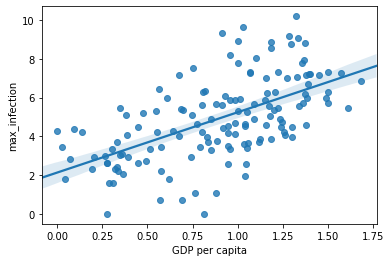

In [33]:
x=data["GDP per capita"]
y=data["max_infection"]
sns.regplot(x,np.log(y))

### Social Support vs max infection rate

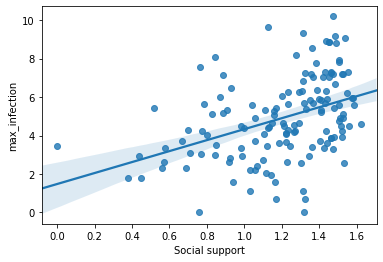

In [35]:
x=data["Social support"]
y=data["max_infection"]
sns.regplot(x,np.log(y))

### Healthy life expentancy vs max infection rate 

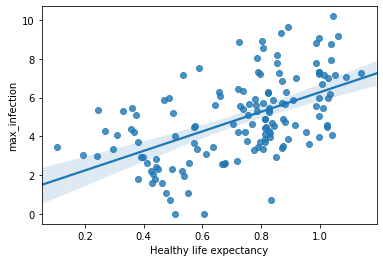

In [38]:
x=data["Healthy life expectancy"]
y=data["max_infection"]
sns.regplot(x,np.log(y))

### Freedom to make life choices vs max infection rate

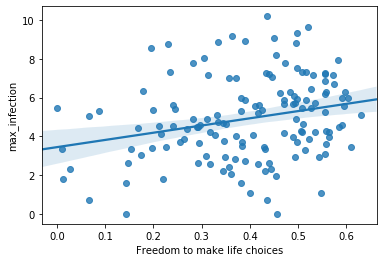

In [39]:
x=data["Freedom to make life choices"]
y=data["max_infection"]
sns.regplot(x,np.log(y))

### From the correlation models obtained by comparing the max infection rate and world happiness record attributes shows that , higher the development (gdp,freedom to make life choices,healthy life expectancy,social support) higher the reports of covid19 cases. So higher the development, higher the risk.  